In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
df = pd.read_csv('/content/ushape.csv')

In [8]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


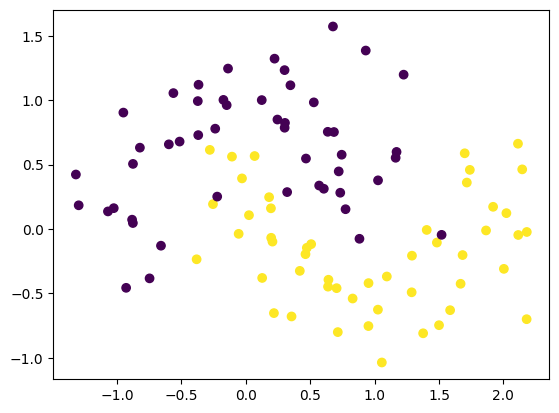

In [9]:
plt.scatter(df['3.159499363321345566e-02'],df['9.869877579082642072e-01'],c=df['0.000000000000000000e+00'])

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

**He normal initialization**

In [13]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.get_weights()

[array([[-0.7489402 ,  0.37159723,  1.4155416 , -0.2658302 , -1.7553487 ,
          0.34224835, -0.5013761 , -1.4396051 , -0.50510174, -0.4795118 ],
        [-0.9699177 ,  1.3197016 , -0.3127529 ,  0.76127505, -0.4325687 ,
         -0.91920465,  0.8289255 , -0.11597341, -0.47233802, -1.0500464 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.5986575 ,  0.3616959 , -0.5180134 ,  0.6549768 , -0.1780264 ,
         -0.30896372, -0.4014125 ,  0.1532652 ,  0.34576938,  0.37052488],
        [-0.00863425, -0.5036643 ,  0.3264396 ,  0.15997082, -0.4524603 ,
         -0.10154382,  0.08544018,  0.80265474,  0.42466322, -0.08680476],
        [-0.14190763, -0.57821447, -0.16188376, -0.63536894, -0.4846778 ,
          0.48100257, -0.48846933, -0.52368766,  0.2814159 ,  0.74104345],
        [ 0.22784196, -0.26749462,  0.58980155, -0.18030405, -0.38082364,
         -0.58998233, -0.6276735 ,  0.3118626 , -0.02093786,  0.4003546 ],
        [-0.00895

In [19]:
initial_weights = model.get_weights()
initial_weights[0] = np.random.randn(2,10)*np.sqrt(2/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(2/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(2/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,1)*np.sqrt(2/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)


In [20]:
model.set_weights(initial_weights)

In [21]:
model.get_weights()

[array([[ 1.7918769 ,  2.3484232 ,  0.77358943, -0.50321895,  0.472349  ,
         -2.191402  ,  0.53860265, -0.33347428, -0.9178062 ,  0.31380185],
        [-0.63993216, -0.04376996,  2.4139967 ,  0.01693111,  0.6558234 ,
          1.4379736 , -0.90490985, -0.1639879 , -0.07742121,  0.6427866 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-6.8148738e-01, -8.8638091e-01, -1.3982639e-01, -1.0202150e-01,
          8.3537173e-01, -1.6125752e-01,  1.0764448e-01,  1.5213451e-01,
         -7.3893887e-01,  6.1668622e-01],
        [-1.6925122e-01,  4.1706145e-01,  8.7695462e-01,  5.8699530e-01,
         -9.2679873e-02,  3.6481601e-01, -1.5948127e-01, -3.3949587e-01,
         -4.1231540e-01, -8.7359709e-01],
        [ 3.4881208e-02, -3.5553956e-01, -8.4390825e-01,  9.6568443e-02,
         -2.7926512e-02, -6.1416611e-02,  3.2690874e-01,  1.4831205e-01,
         -1.4950931e-02,  2.6274624e-01],
        [ 1.2572533e-01,  6.0195524e-02,  3.21092

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
history = model.fit(X,y,epochs=50,validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8874 - loss: 0.2954 - val_accuracy: 0.9000 - val_loss: 0.2188
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8679 - loss: 0.3162 - val_accuracy: 0.9000 - val_loss: 0.2173
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8562 - loss: 0.3363 - val_accuracy: 0.9000 - val_loss: 0.2161
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8405 - loss: 0.3707 - val_accuracy: 0.9000 - val_loss: 0.2146
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8796 - loss: 0.3125 - val_accuracy: 0.9000 - val_loss: 0.2125
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8835 - loss: 0.3039 - val_accuracy: 0.9000 - val_loss: 0.2110
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8444 - loss: 0.3557 - val_accuracy: 0.9000 - val_loss: 0.2102
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8562 - loss: 0.3350 - val_accuracy: 0.9500 - val_loss: 0.2088

In [29]:
model.get_weights()

[array([[ 1.6863087 ,  2.4964716 ,  0.79149103, -0.49038547,  0.4405429 ,
         -2.1978936 ,  0.60535306, -0.490408  , -0.8227598 ,  0.38857874],
        [-0.70431834, -0.17509674,  2.4507208 ,  0.03864808,  0.7269873 ,
          1.4346359 , -0.75007296, -0.13309588, -0.13429753,  0.6883497 ]],
       dtype=float32),
 array([-0.04853115,  0.03005228,  0.1351501 , -0.07931349,  0.05844918,
        -0.1255127 , -0.14630799,  0.01809832, -0.06864951,  0.03382325],
       dtype=float32),
 array([[-0.61647016, -0.8206908 ,  0.03607945,  0.02344127,  0.76670337,
         -0.07587396,  0.03817331,  0.23804437, -0.73893887,  0.68890226],
        [-0.08298985,  0.5372156 ,  1.0410463 ,  0.69248915, -0.17575775,
          0.3485407 , -0.19701204, -0.16200057, -0.4123154 , -0.79617214],
        [ 0.10161895, -0.23175777, -0.80524594,  0.06654152, -0.19219932,
         -0.12078901,  0.27070546,  0.3224728 , -0.01495093,  0.36466032],
        [ 0.18832088,  0.23622826,  0.37262166,  0.6536535 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

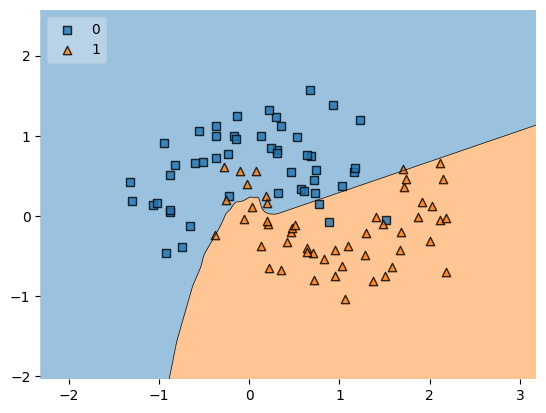

In [30]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)